In [1]:
from ImageLab import *
import numpy as np

Kernels

In [2]:
def diamond_kernel(n):
    # Create a grid of coordinates
    x, y = np.meshgrid(np.arange(n+1), np.arange(n+1))
    # Calculate the distance from the center of the grid
    r = np.abs(x - n/2) + np.abs(y - n/2)
    # Create a kernel that is 1 inside the diamond and 0 outside
    kernel = np.zeros((n+1, n+1))
    kernel[r <= n/2] = 1
    return kernel

def circle_kernel(n):
    # Create a grid of coordinates
    x, y = np.meshgrid(np.arange(n-1), np.arange(n-1))
    # Calculate the distance from the center of the grid
    r = np.sqrt((x+1 - n/2)**2 + (y+1 - n/2)**2)
    # Create a kernel that alternates 1's and 0's based on the distance from the center
    kernel = np.zeros((n-1, n-1))
    kernel[r < n/2] = 1
    kernel = kernel.astype(int)
    return kernel

vkernel3 = np.array([[0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0]])

vkernel1 = np.array([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0]])

hkernel3 = np.array([[0, 0, 0, 0, 0],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [0, 0, 0, 0, 0]])

hkernel1 = np.array([[0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0]])

xkernel1 = np.array([[1, 0, 0, 0, 1],
                    [0, 1, 0, 1, 0],
                    [0, 0, 1, 0, 0],
                    [0, 1, 0, 1, 0],
                    [1, 0, 0, 0, 1]])

xkernel3 = np.array([[1, 1, 0, 0, 0, 1, 1],
                    [1, 1, 1, 0, 1, 1, 1],
                    [0, 1, 1, 1, 1, 1, 0],
                    [0, 0, 1, 1, 1, 0, 0],
                    [0, 1, 1, 1, 1, 1, 0],
                    [1, 1, 1, 0, 1, 1, 1],
                    [1, 1, 0, 0, 0, 1, 1]])

tkernel1 = np.array([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0]])

tkernel3 = np.array([[0, 0, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 0, 0],
                    [1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1],
                    [0, 0, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 0, 0]])

hsobel3 = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

vsobel3 = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])

Image Enhancement

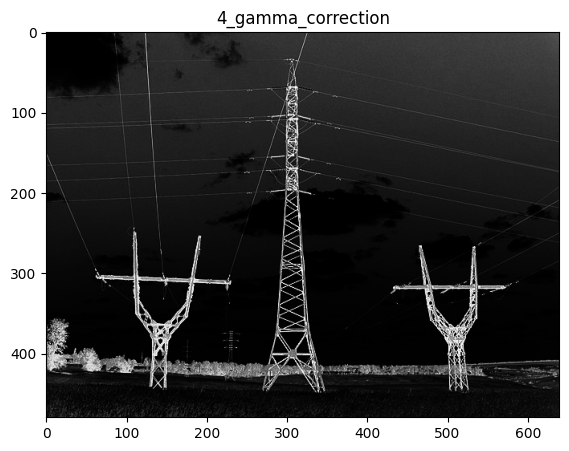

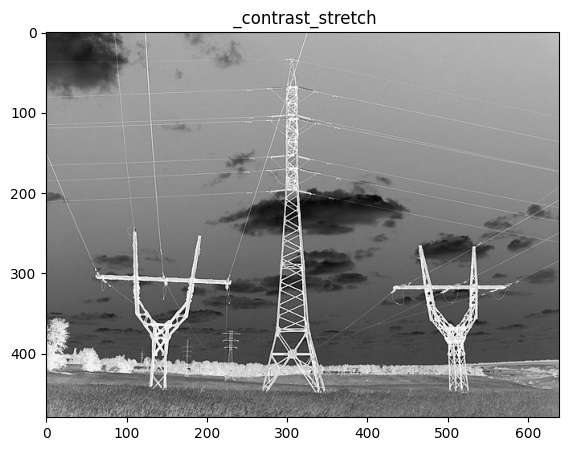

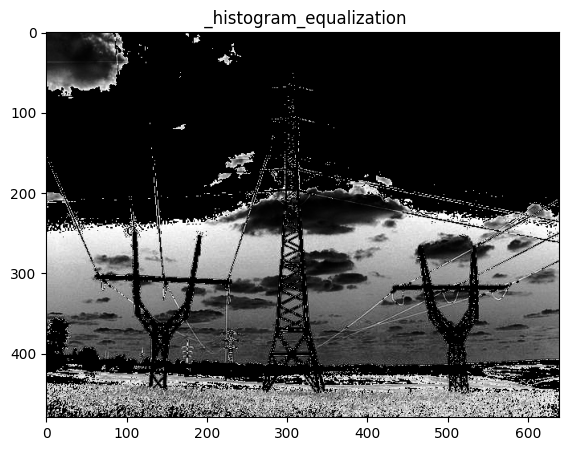

In [3]:
folder_name = 'PowerLineProject/Picture1'

inverted, inverted_path = ColorSpace('Image/PowerLineProject/TrainImages/9.jpg', folder_name, 'inverted').process(inversion())
gray, inverted_path = ColorSpace(inverted_path, folder_name, 'gray').process(rgb_to_grayscale())

gamma, gamma_path = Filters(inverted_path, folder_name, '4', plot = True).process(gamma_correction(4))
gamma1, gamma1_path = Filters(inverted_path, folder_name, ' ', plot = True).process(contrast_stretch())
gamma2, gamma2_path = Filters(inverted_path, folder_name, ' ', plot = True).process(histogram_equalization())
# gpixel, gpixel_path = Segment(gamma_path, folder_name, 'gPixel', plot=True).process(Global_Threshold(80))

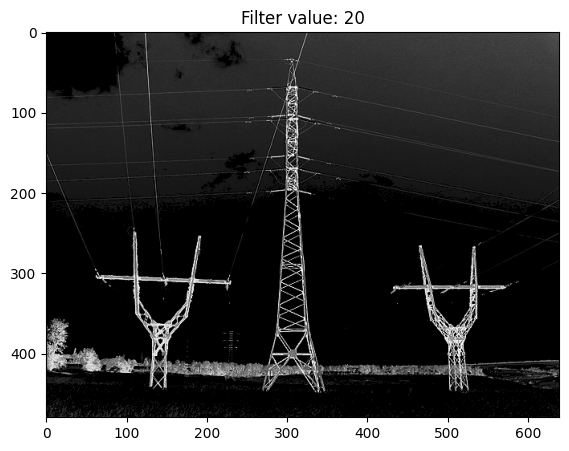

In [4]:
# diff = openned1 - openned2
gt, gamma_path = Segment(gamma_path, folder_name, 'adaptive_threshold').process(pixels_above_threshold(20))

Segmentation Experimentation

(482, 642, 1)


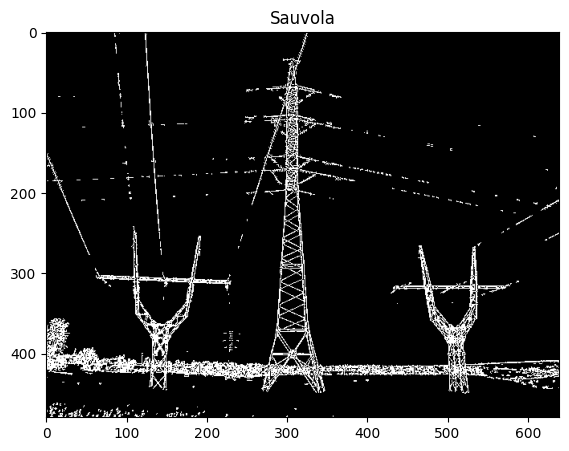

In [5]:
sauvola, sauvola_path = Segment(gamma_path, folder_name, 'adaptive_threshold1').process(Pixel_Filter(3, 50, 'Sauvola'))
#gt, gt_path = Segment(gamma_path, folder_name, 'adaptive_threshold1').process(Pixel_Filter(3, 50, 'Niblack'))
# gt, gt_path = Segment(gamma_path, folder_name, 'adaptive_threshold1').process(Pixel_Filter(3, 50, 'Bernsen'))

The Sauvola Segmentation method will be used to obtain the segmentation. This will be multiplied by the grayscale image to obtain
the Segmented Gray Image.

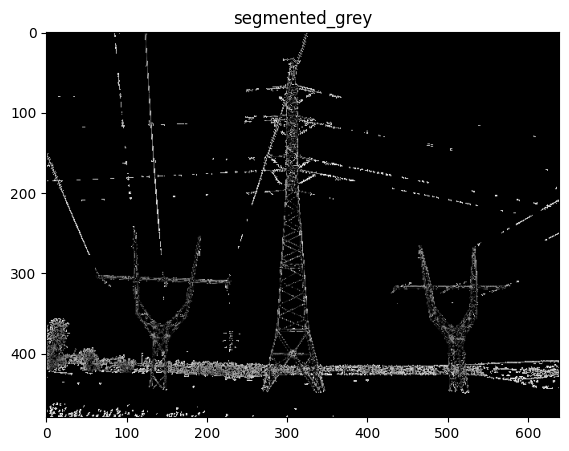

In [33]:
seggrey = sauvola * gamma

ImagePlotter(seggrey).plot_image('segmented_grey')

Pixel-wise segmentation was limited in usefulness. Sauvola tended to filter out everything except the line between the sky and the ground. Niblack and Bernsen tended to create noise everywhere in the image - there may be an entropy-related way to fix this issue. The application of an adaptive threshold seemed to work the best.

Investigation continues through the exploration of edge filters. Edge filters of certain geometries can emphasize certain geometries.

In [34]:
# hcustom = np.array([[-1, 0, 1],
#                     [-1, 0, 1],
#                     [-1, 0, 1]])
# hcustom = hcustom

# vcustom = np.array([[1, 1, 1],
#                     [0, 0, 0],
#                     [-1, -1, -1]])
# vcustom = vcustom


# diagonal1 = ImageProcessor(seggrey, plot = True).process(Convolution(), hcustom)
# diagonal2 = ImageProcessor(seggrey, plot = True).process(Convolution(), vcustom)

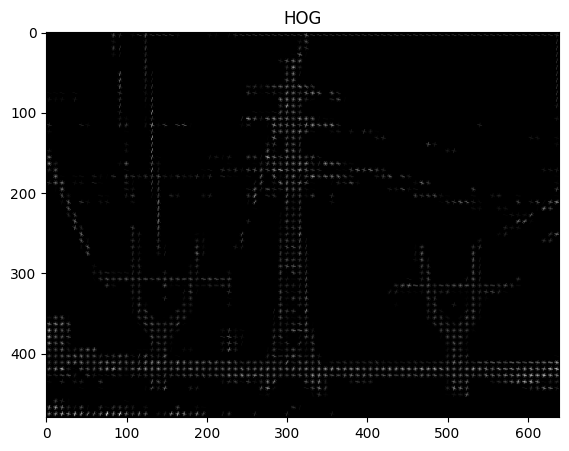

In [35]:
import cv2
from skimage.feature import hog

# mag = ImageMultiProcessor(diagonal1, diagonal2).process(Gradient_Magnitude())
# dir = ImageMultiProcessor(diagonal1, diagonal2).process(Gradient_Direction())
# ImagePlotter(mag).plot_image('magnitude')
# ImagePlotter(dir).plot_image('direction')

seggrey = np.squeeze(seggrey)

# # # Set the new dimension
# dim = (512, 512) # width, height

# # # Resize the image
# seggrey = cv2.resize(seggrey, dim, interpolation=cv2.INTER_AREA)


fd, hog_image = hog(seggrey, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True)

ImagePlotter(hog_image).plot_image('HOG')

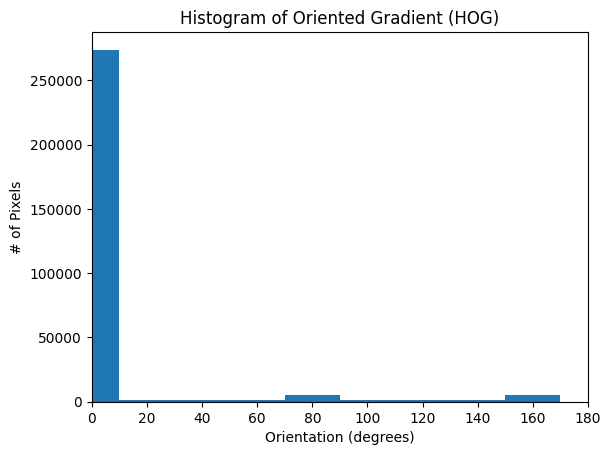

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Calculate x and y gradients using Sobel operator
gx = cv2.Sobel(seggrey, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(seggrey, cv2.CV_32F, 0, 1, ksize=1)

# Calculate magnitude and angle of gradients
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

# Build histogram for angles
hist, bins = np.histogram(angle, bins=9, range=(0., 180.))

# Plot histogram
plt.bar(bins[:-1], hist, width=20)
plt.xlim(min(bins), max(bins))
plt.title("Histogram of Oriented Gradient (HOG)")
plt.xlabel("Orientation (degrees)")
plt.ylabel("# of Pixels")
plt.show()

The direction map gives a specific quality - a long line in roughly one direction which is distinct from the rest of the image.

This histogram is relatively evenly distributed. Contrast stretching is thus unlikely to yield the desired any significant differences.

New Theory - there is a limit to how well we can separate the powerlines from the background. It may help to better utilize orientation to identify the line segments. The advantage of hog is that it doesn't care about differences in local light levels.

c:\Programs\Image Processing\Color Space\venv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  import sys


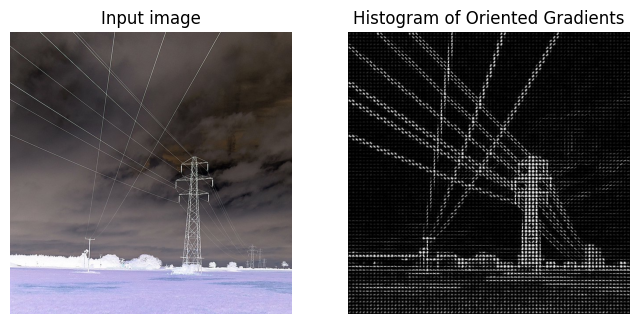

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure

image = inverted
fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(7, 7), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

First, we invert the image since we are emphasizing dark wires. Then apply image enhancement to increase the contrast between lighter and darker areas of the image. This makes it easier to threshold. Edges are obtained either through adaptive global thresholding, edge kernel convolution, or through morphological edge processing.

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

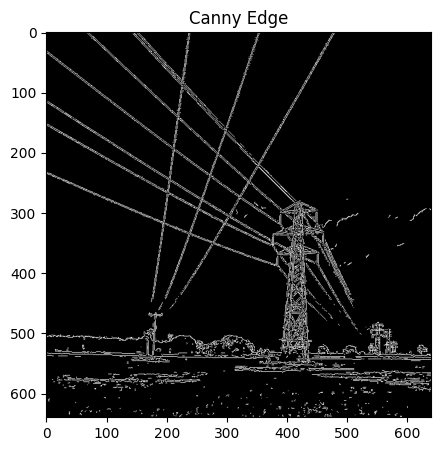

In [ ]:
import cv2

def canny_edge_detection(image):
    # Convert the image to grayscale
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # # Apply Gaussian blur to the grayscale image
    # blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection to the blurred image
    edges = cv2.Canny(image, 90, 120)

    return edges

ImagePlotter(canny_edge_detection(inverted)).plot_image('Canny Edge')

diamond_kernel(12)

LoG is not good because it creates edges that don't exist in the original image. Furthermore, it prevents the horizon calculation from working.

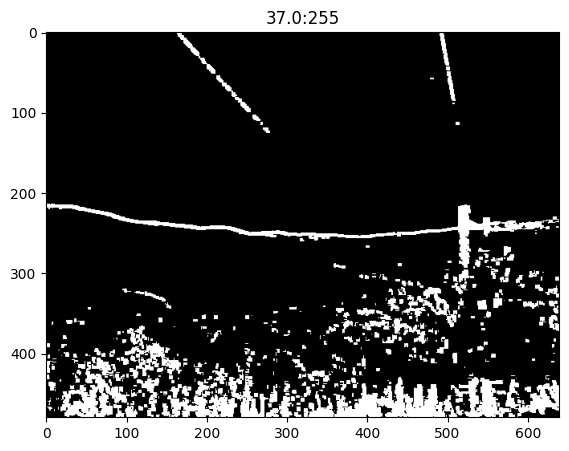

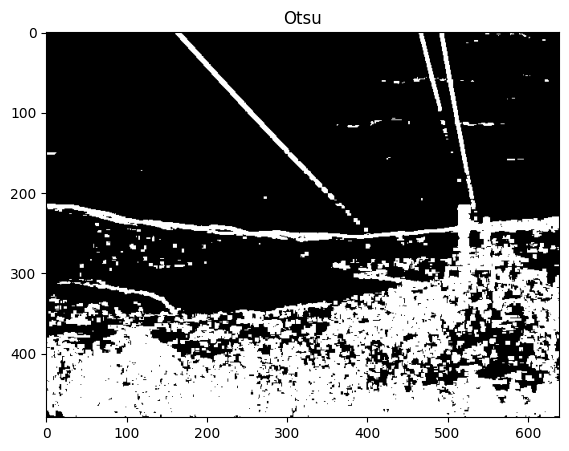

In [ ]:

gamma, gamma_path = Filters(diff_path, folder_name, 'gamma_correction').process(gamma_correction(1.5))


segmented, segmented_path = Segment(gamma_path, folder_name, 'segmented').process(Adaptive_Global_Threshold())

_, thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ImagePlotter(thresh).plot_image('Otsu')

horizon rows require greater filtration. Anectotally, it seems that adaptive global thresholding is suitable for this purpose.

38400

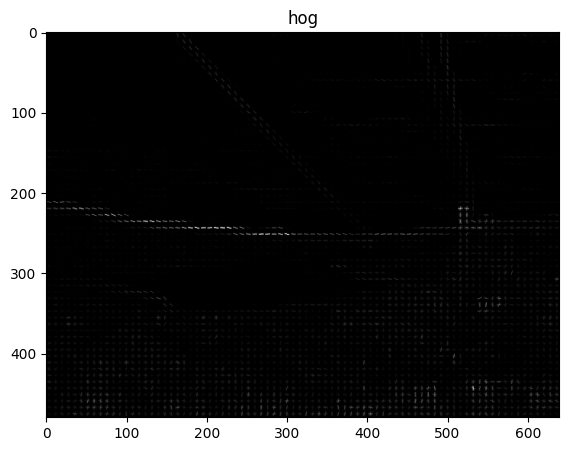

In [ ]:
gamma = np.squeeze(gamma)

fd, hog_image = hog(gamma, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True)

ImagePlotter(hog_image).plot_image('hog')
fd.size

For each image tested in this pipeline, it appears that the power lines are mostly drowned out in images that share both ground and sky. In order to reduce the influence of ground information, I believe it is a good idea to determine the row that has the highest binary frequency - the horizon.

In [ ]:
def create_histogram(image):
    # Create a histogram with each bin being a row in the image
    histogram = np.sum(image, axis=1)

    return np.argmax(histogram)

create_histogram(thresh)

468

Not all images have ground in them, so this operation should only be run if the ratio of green pixels is greater than a certain value. Else, there is a risk that it will fit to horizontal powerlines and trim them from the image.

For the sake of ground avoidance, the ratio of ground to sky pixels may be sufficient in areas without trees. For this project, the identification of power polls and power towers is useful. These are objects that are both useful to identify and useful to use as an origin for edge tracking operations. We will also use the ground sky separater to better distinguish powerlines in the future. Thus, the main identification target for this project is the powertowers.